# Midterm project

## Objectives 

* Think of a problem that's interesting for you and find a dataset for that
* Describe this problem and explain how a model could be used
* Prepare the data and doing EDA, analyze important features
* Train multiple models, tune their performance and select the best model
* Export the notebook into a script
* Put your model into a web service and deploy it locally with Docker
* Bonus points for deploying the service to the cloud

### Think of a problem that's interesting for you and find a dataset for that

    As I do not have much experience with classification problems, I am interested in choosing a problem of this type so as to gain more confidence in analysing this type of data.  I have been exploring many keaggle classification competitions and I have reached the Salary Prediction Classification which seems to be a nice problem to work on. 
    
### Describe this problem and explain how a model could be used

    This database consist of an extraction made by Barry Becker from the 1994 U.S. census database, and the prediction task is to determine whether a person makes over 50K a year. This problmes it is a binary classification problem where the objective class distribution is imbalanced. The dataset consists of 14 input variables where we can find categorical, ordinal, and numerical data. The complete list of variables is:
* Age.
* Workclass.
* Final Weight.
* Education.
* Education Number of Years.
* Marital-status.
* Occupation.
* Relationship.
* Race.
* Sex.
* Capital-gain.
* Capital-loss.
* Hours-per-week.
* Native-country.
* Income


### Access the data
    https://www.kaggle.com/datasets/ayessa/salary-prediction-classification/download?datasetVersionNumber=1



In [2]:
# Imports 
import pandas as pd
import numpy as np
import scipy.stats as ss
import random
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Metrics and Cross validation
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Predictive modelling
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'xgboost'

### Prepare the data and doing EDA, analyze important features

In [5]:
datos = pd.read_csv('/home/martin/mlbookcamp-code/course-zoomcamp/MidtermProject/salary.csv')
# datos = pd.read_csv('C:/Users/marti/Desktop/DataScience/Sprint1/salary.csv')

In [7]:
datos.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [86]:
datos.shape

(32561, 15)

In [87]:
datos.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [3]:
respuesta = ["salary"]
numericas = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
categoricas = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]

In [89]:
datos[["salary"]].value_counts()/datos.shape[0]

salary
 <=50K    0.75919
 >50K     0.24081
dtype: float64

#### Exploring missing values

In [90]:
datos.isna().sum() / datos.shape[0]

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [91]:
# Exploring categories:
for i in categoricas:
    print(i)
    print(datos[i].unique())

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex
[' Male' ' Female']
native-country
[' United-States' ' Cuba' ' Jamaica' ' India' '

    Exploring the dataset I have realized that the missing data is encoded as " ?", so I am going to transform to a NA value. 

In [6]:
datos = datos.replace(" ?", np.nan)

In [6]:
(datos.isna().sum() / datos.shape[0])*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
salary            0.000000
dtype: float64

In [94]:
# Exploring categories:
for i in categoricas:
    print(i)
    print(datos[i].unique())

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex
[' Male' ' Female']
native-country
[' United-States' ' Cuba' ' Jamaica' ' India' nan

    Nos I proceed to explore the variables that have NA values, so as to define a methodology to treat them. 

In [95]:
(datos["workclass"].value_counts()/datos.shape[0])*100

 Private             69.703019
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
 State-gov            3.986364
 Self-emp-inc         3.427413
 Federal-gov          2.948312
 Without-pay          0.042996
 Never-worked         0.021498
Name: workclass, dtype: float64

In [96]:
(datos["occupation"].value_counts()/datos.shape[0])*100

 Prof-specialty       12.714597
 Craft-repair         12.588680
 Exec-managerial      12.487331
 Adm-clerical         11.578268
 Sales                11.209729
 Other-service        10.119468
 Machine-op-inspct     6.148460
 Transport-moving      4.904641
 Handlers-cleaners     4.207487
 Farming-fishing       3.052732
 Tech-support          2.850035
 Protective-serv       1.993182
 Priv-house-serv       0.457603
 Armed-Forces          0.027640
Name: occupation, dtype: float64

In [97]:
(datos["native-country"].value_counts()/datos.shape[0])*100

 United-States                 89.585701
 Mexico                         1.974755
 Philippines                    0.608089
 Germany                        0.420749
 Canada                         0.371610
 Puerto-Rico                    0.350112
 El-Salvador                    0.325543
 India                          0.307116
 Cuba                           0.291760
 England                        0.276404
 Jamaica                        0.248764
 South                          0.245693
 China                          0.230337
 Italy                          0.224195
 Dominican-Republic             0.214981
 Vietnam                        0.205768
 Guatemala                      0.196554
 Japan                          0.190412
 Poland                         0.184270
 Columbia                       0.181198
 Taiwan                         0.156629
 Haiti                          0.135131
 Iran                           0.132060
 Portugal                       0.113633
 Nicaragua      

    We can see that for the variables workclass and native-country the most repeated category is in a far superior proportion in respect to the others, for the case of workclass this is Private which is repeated 19279 (69.70%) times compared to the second most repeated which is only 2156 (7.8%) times. For the variable native-country United-States it is repeated 24811 (89.58%),  while the second most repeated is Mexico with 532 (1.97%) repetitions. For this reason, imputing the missing values as the major category would not introduce to much noise to the database and it is the simpliest aproach I could try. 

    What happens with the occupation variable is different, where all of the most repeated categories are in the repeated the same number of times and therefore we must choose another method to impute the missing data, because the previous one is going to introduce too much noise to the dataset. 

    Moreover the variable native-country seems to be of constant variance since all the mayority of the observations 91.5% belong to the same category United States, we do not believe that its inclusion in the predictive model is relevant, besides it has 41 categories, but we have to take in to account that the predictive model is going to be far sesgated to employers that work in the U.S. . An other alternative is to exclude all the data that belong to a different country and make a predictive model specialized in predicting for the United States. 
    
    In order to replace the missing data of the variable ocupation I am going to study the association between the other categorical variables to this one so as to explore a way of interpolating its values with respect to other variables. The way to study the association of the categorical variables is by the V of Cramér coeficient. 

In [7]:
datos["native-country"] = datos["native-country"].replace(np.nan," United-States")
datos["workclass"] = datos["workclass"].replace(np.nan," Private")

In [99]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [100]:
for i in categoricas:
    print(i)
    print(cramers_v(datos["occupation"], datos[i]))

workclass
0.21504685867116732
education
0.1962500790133617
marital-status
0.12989569771194034
occupation
1.0
relationship
0.17680191661980038
race
0.08020715739723544
sex
0.4337804392331305
native-country
0.06695667683316452


    From this information we can see that the variable most closely related to occupation is sex in fist place and in second workclass, this information is going to be use to interpolate occupation's missing values.
    I am going to proceed to analyse the value counts of the combination of these variables. 

In [8]:
grouped = datos.groupby(["occupation","sex"], as_index=False).size()
grouped.sort_values(by='size',ascending=False)

,occupation,sex,size
4,Craft-repair,Male,3877
6,Exec-managerial,Male,2907
18,Prof-specialty,Male,2625
0,Adm-clerical,Female,2537
22,Sales,Male,2387
13,Other-service,Female,1800
17,Prof-specialty,Female,1515
26,Transport-moving,Male,1507
14,Other-service,Male,1495
12,Machine-op-inspct,Male,1452


    I choose to replace the missing values of the occupation with Craft-repair, Exec-managerial, Prof-specialty, and Sales if the gender of the missing value is Male, and with Adm-clerical, Other-service, Prof-specialty, and Sales if the gender of the missing value is Female, in random order, so as to decrece the noise introduced in case I have had relaced the missing values by the most repeated category.

In [8]:
male = datos["sex"] == ' Male'
female = datos["sex"] == ' Female'
nans = datos['occupation'].isna()
na_male = np.logical_and(male, nans)
na_female = np.logical_and(female, nans)
length_male = sum(na_male)
length_female = sum(na_female)
replacement_male = random.choices([" Craft-repair"," Exec-managerial"," Prof-specialty"," Sales"], weights=[.25, .25,.25, .25], k=length_male)
replacement_female = random.choices([" Adm-clerical"," Other-service"," Prof-specialty"," Sales"], weights=[.25, .25,.25, .25], k=length_female)

datos.loc[na_male,'occupation'] = replacement_male
datos.loc[na_female,'occupation'] = replacement_female

In [10]:
(datos.isna().sum() / datos.shape[0])*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

    Now that I have treated the NA values I am going to proceed to make an exploratory data analysis. 
#### Categorical variables

In [104]:
for i in categoricas:
    print(i)
    print(cramers_v(datos["salary"], datos[i]))

workclass
0.16778266557375787
education
0.3682189037932643
marital-status
0.4472047182882558
occupation
0.3294461163854272
relationship
0.45342258188631135
race
0.10020254494940377
sex
0.21583599679826912
native-country
0.09226257347210916


    The most related variables in descending order to the target variable are:
* relationship
* marital-status
* education
* occupation
* sex

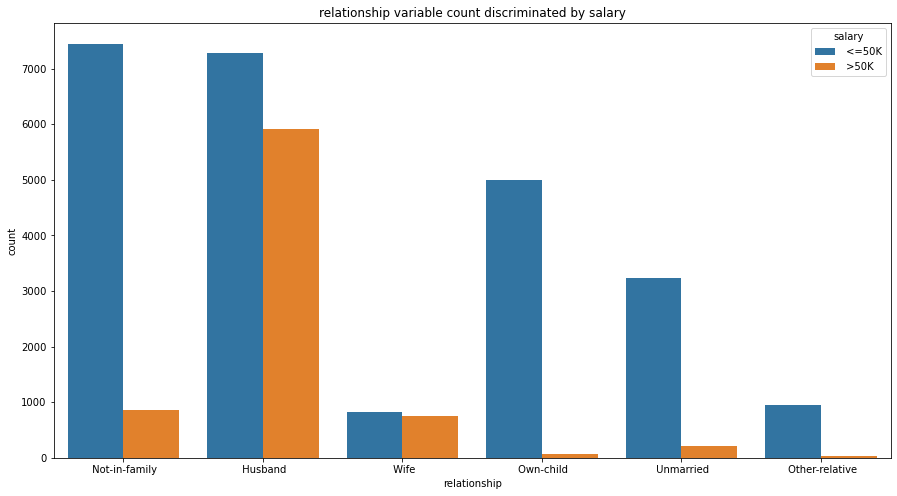

In [116]:
plt.figure(figsize=(15,8))
sns.countplot(x='relationship', data=datos, hue='salary').set(title='Relationship variable count discriminated by salary')
plt.show();

In [117]:
(datos["relationship"].value_counts()/datos.shape[0])*100

 Husband           40.517797
 Not-in-family     25.505973
 Own-child         15.564633
 Unmarried         10.583213
 Wife               4.815577
 Other-relative     3.012807
Name: relationship, dtype: float64

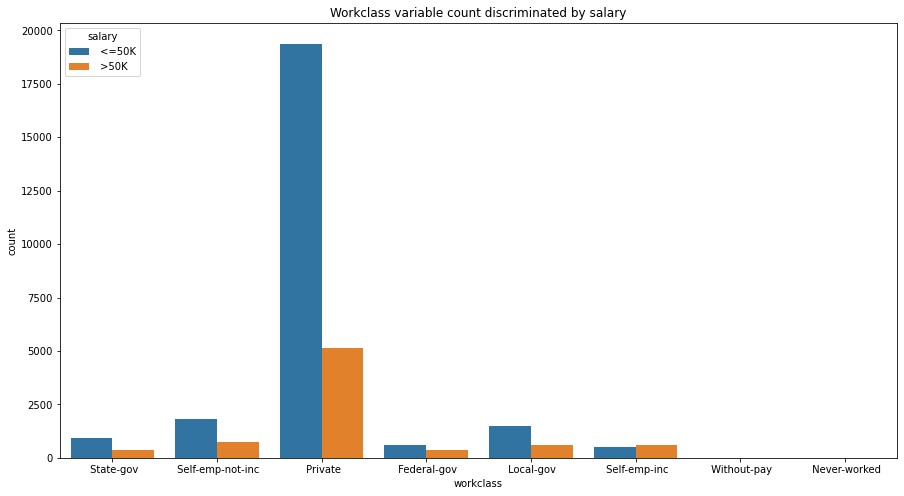

In [114]:
plt.figure(figsize=(15,8))
sns.countplot(x='workclass', data=datos, hue='salary').set(title='Workclass variable count discriminated by salary')
plt.show();

In [115]:
(datos["workclass"].value_counts()/datos.shape[0])*100

 Private             75.341666
 Self-emp-not-inc     7.803814
 Local-gov            6.427935
 State-gov            3.986364
 Self-emp-inc         3.427413
 Federal-gov          2.948312
 Without-pay          0.042996
 Never-worked         0.021498
Name: workclass, dtype: float64

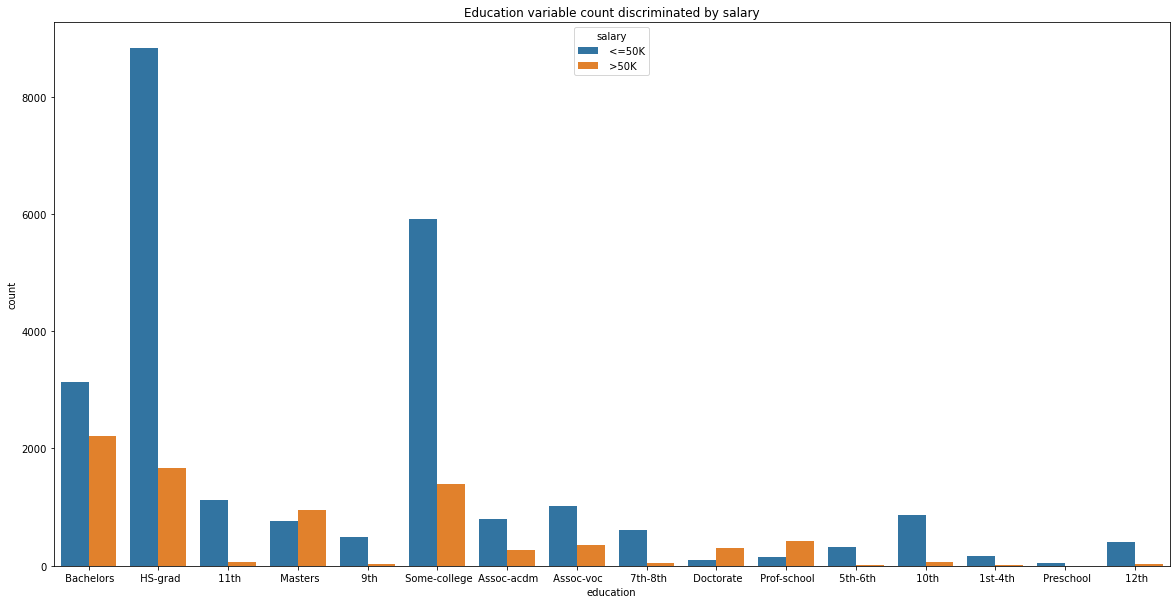

In [123]:
plt.figure(figsize=(20,10))
sns.countplot(x='education', data=datos, hue='salary').set(title='Education variable count discriminated by salary')
plt.show();

In [119]:
(datos["education"].value_counts()/datos.shape[0])*100

 HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
 11th             3.608612
 Assoc-acdm       3.276926
 10th             2.865391
 7th-8th          1.983969
 Prof-school      1.768987
 9th              1.578576
 12th             1.329812
 Doctorate        1.268389
 5th-6th          1.022696
 1st-4th          0.515955
 Preschool        0.156629
Name: education, dtype: float64

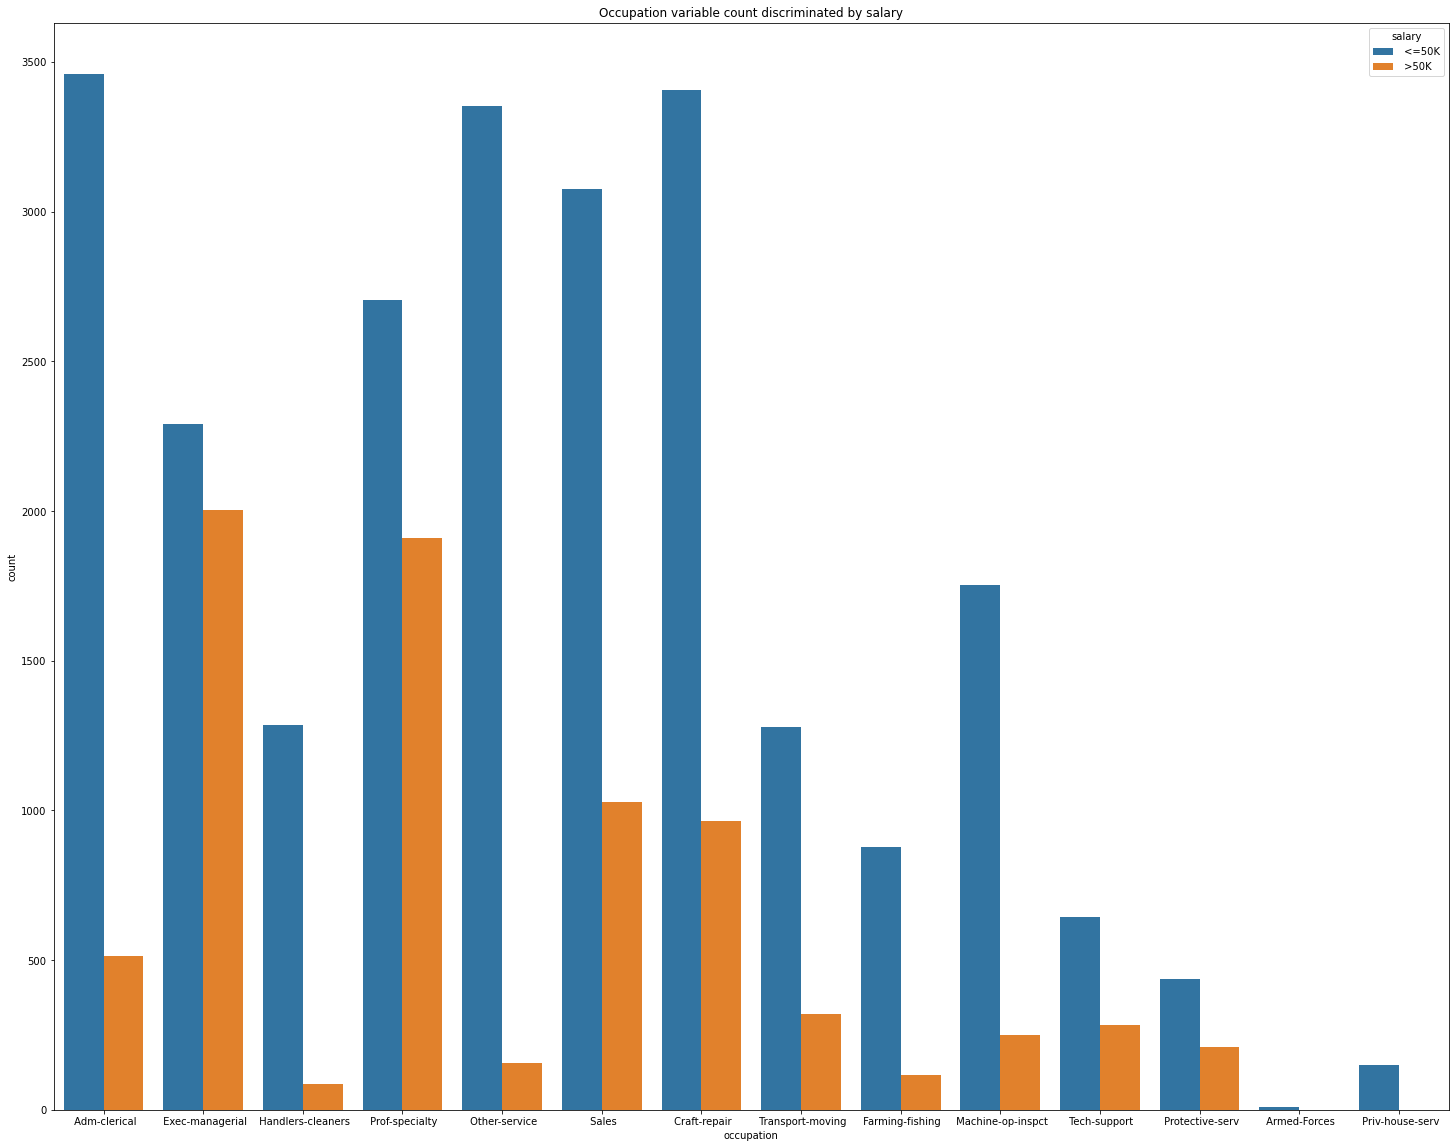

In [122]:
plt.figure(figsize=(25,20))
sns.countplot(x='occupation', data=datos, hue='salary').set(title='Occupation variable count discriminated by salary')
plt.show();

In [121]:
(datos["occupation"].value_counts()/datos.shape[0])*100

 Prof-specialty       14.167255
 Craft-repair         13.417893
 Exec-managerial      13.190627
 Sales                12.600964
 Adm-clerical         12.201714
 Other-service        10.779767
 Machine-op-inspct     6.148460
 Transport-moving      4.904641
 Handlers-cleaners     4.207487
 Farming-fishing       3.052732
 Tech-support          2.850035
 Protective-serv       1.993182
 Priv-house-serv       0.457603
 Armed-Forces          0.027640
Name: occupation, dtype: float64

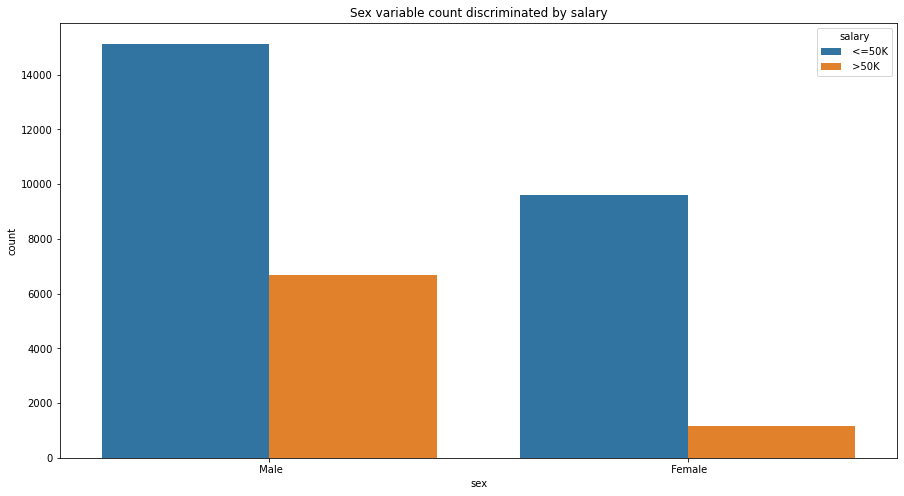

In [124]:
plt.figure(figsize=(15,8))
sns.countplot(x='sex', data=datos, hue='salary').set(title='Sex variable count discriminated by salary')
plt.show();

In [125]:
(datos["sex"].value_counts()/datos.shape[0])*100

 Male      66.920549
 Female    33.079451
Name: sex, dtype: float64

#### Numerical variables

In [9]:
# Create new variable
datos["capital-total"] = datos["capital-gain"] - datos["capital-loss"]

In [126]:
datos[numericas].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


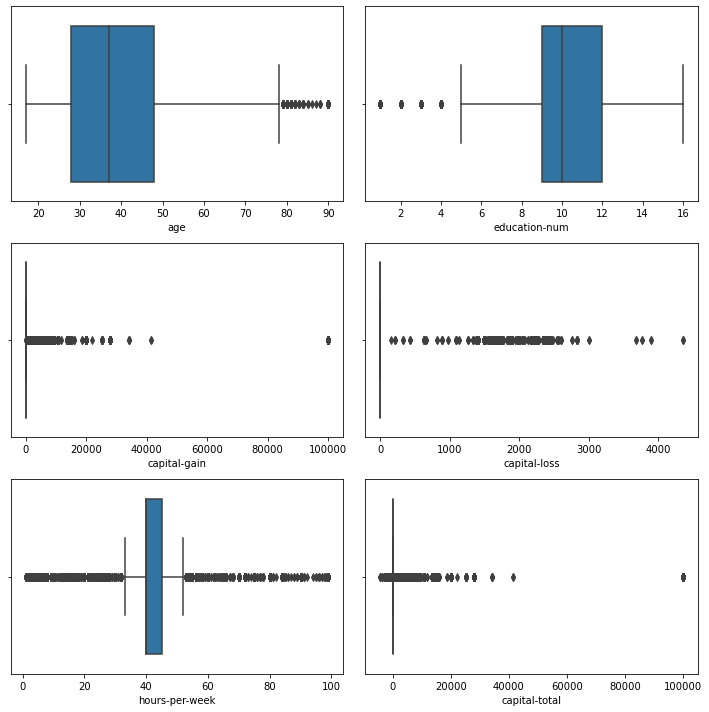

In [129]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(x=datos.age)

plt.subplot(3,2,2)
sns.boxplot(x=datos['education-num'])

plt.subplot(3,2,3)
sns.boxplot(x=datos['capital-gain'])

plt.subplot(3,2,4)
sns.boxplot(x=datos['capital-loss'])

plt.subplot(3,2,5)
sns.boxplot(x=datos['hours-per-week'])

plt.subplot(3,2,6)
sns.boxplot(x=datos['capital-total'])

plt.tight_layout()

    We can see that the variables related to capital have many outliers, but when analyzing the data these values seem to be correct, for this reason I will not eliminate their values.

    We will filter some values of the variable hours-per-week because the value of 0 seems to be incorrect, since if it does not work any hours it does not make sense to analyze it.

In [11]:
datos = datos[datos["hours-per-week"] > 0]

In [10]:
# Factorize target variable
datos['salary-num'] = pd.factorize(datos.salary)[0]

In [52]:
datos[["salary"]].value_counts()/datos.shape[0]

salary
 <=50K    0.75919
 >50K     0.24081
dtype: float64

In [51]:
datos[["salary-num"]].value_counts()/datos.shape[0]

salary-num
0             0.75919
1             0.24081
dtype: float64

    Salary categories:
    <=50K is 0.
    >50K is 1.

    I proceed to calculate the correlation between the numerical variables

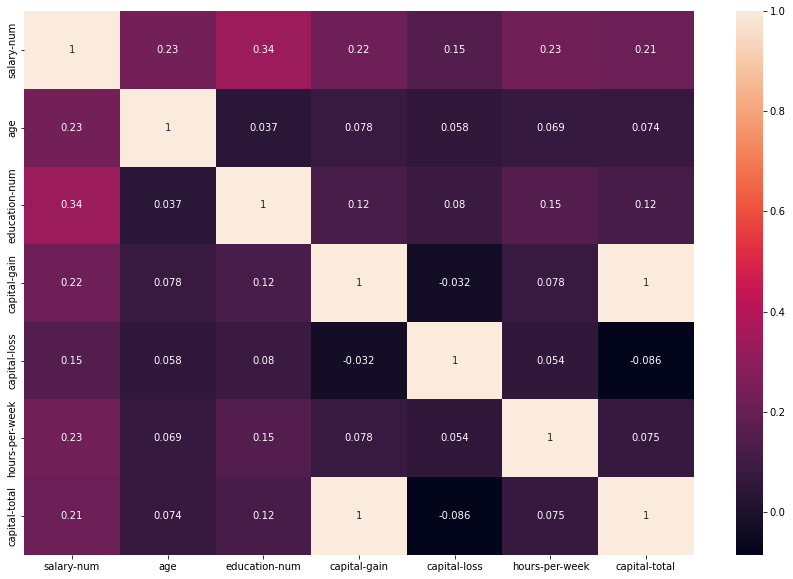

In [11]:
cor_numericas = ["salary-num","age","education-num","capital-gain","capital-loss","hours-per-week","capital-total"]
df_corr = datos[cor_numericas].copy()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(method='pearson'), annot=True)
plt.show()

    The numerical variables with which the response correlates the most are:

* education-num
* age
* capital-gain
* hours-per-weeek
* capital-total 
* capital-loss

    In decreasing order. 

#### Creating dataset to work on when developing the predictive modelling.

In [15]:
datos[["education","education-num"]].sort_values(by='education-num',ascending=False).head(2),datos[["education","education-num"]].sort_values(by='education-num',ascending=False).tail(2)

(        education  education-num
 11210   Doctorate             16
 4597    Doctorate             16,
        education  education-num
 8080   Preschool              1
 7070   Preschool              1)

    From this we can see that the education-num values have an order given by the degree of education attained.

## Variables preprocessing
    In this step I am going to scale numerical variables and do the specific type of encoding for each of the categorical variables. 

#### Scalling numerical variables

In [12]:
df_proc=datos.drop(["education","salary"], axis=1)

In [13]:
# df_proc = datos.copy()
numericas = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week","capital-total"] 
scaler = StandardScaler()
scaler.fit(df_proc[numericas])
df_proc[numericas]=scaler.transform(df_proc[numericas])

#### Encoding categorical variables

    For categorical variables, which have one category that dominates over the others in terms of percentage of values for that category, I will proceed to implement another method of enconding categorical variables different of OneHotEnconding, as the categories with lower percentages would have a very large number of zero values with respect to ones, which would have little meaning in terms of information for the predictive modelling. 

    Furthermore, for categorical variables with many levels, if we perform OneHotEnconding, this would lead to a significant increase in the dimensionality of the data and, as it is said in the jargon, would lead to "the curse of dimensionality", where large data dimensions lead to the deterioration of the performance of the predictive modeling. 

    Target encoding for categorical variables

In [14]:
encoder_NC = TargetEncoder()
encoder_NC.fit(df_proc['native-country'], df_proc['salary-num'])
df_proc['native-country'] = encoder_NC.fit_transform(df_proc['native-country'], df_proc['salary-num'])

/home/martin/anaconda3/envs/ml-course/lib/python3.9/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/home/martin/anaconda3/envs/ml-course/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [15]:
encoder_W = TargetEncoder()
encoder_W.fit(df_proc['workclass'], df_proc['salary-num'])
df_proc['workclass'] = encoder_W.fit_transform(df_proc['workclass'], df_proc['salary-num'])

/home/martin/anaconda3/envs/ml-course/lib/python3.9/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/home/martin/anaconda3/envs/ml-course/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [16]:
encoder_R = TargetEncoder()
encoder_R.fit(df_proc['race'], df_proc['salary-num'])
df_proc['race'] = encoder_R.fit_transform(df_proc['race'], df_proc['salary-num'])

/home/martin/anaconda3/envs/ml-course/lib/python3.9/site-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/home/martin/anaconda3/envs/ml-course/lib/python3.9/site-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


### Divide data in features and target variable

In [104]:
X = df_proc.loc[:, df_proc.columns != "salary-num"]
y = df_proc["salary-num"]

### Perform DictVectorizer in categorical variables in the feature variables:

In [105]:
# Numerical variables at this step
numerical = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week","capital-total","education-num","race","native-country","workclass"]

# Categorical variables in which I want to perform DictVectorizer, so as to save the model and use it in the future. 
categorical = ["marital-status","occupation","relationship","sex"]

In [106]:
from sklearn.feature_extraction import DictVectorizer
dicts = X[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)

In [107]:
dicts[0]

{'marital-status': ' Never-married',
 'occupation': ' Adm-clerical',
 'relationship': ' Not-in-family',
 'sex': ' Male',
 'age': 0.030670557354391753,
 'fnlwgt': -1.0636107451560883,
 'capital-gain': 0.14845289521747937,
 'capital-loss': -0.21665952703259014,
 'hours-per-week': -0.03542944697277691,
 'capital-total': 0.15976180957827668,
 'education-num': 13,
 'race': 0.2558599367270636,
 'native-country': 0.24592478069438375,
 'workclass': 0.27195685670261943}

#### Resuming the preprocessing
    Treatment for each variable:
    
* Numerical:  'age','fnlwgt','capital-gain','capital-loss','hours-per-week','capital-total'. For numerical variables I am going to scale them.
    
* Categorical: 
   * Target encoder: 'native-country','workclass', 'race'. 
   * Binary or OneHotEncoder by the implementation of DictVectorizer: 'marital-status', 'occupation', 'relationship', 'sex','salary'.  
    
   * Variables ready to model: 'education-num',
    
   * Variables to drop: 'education', 'salary-num'

### Preprocessing method ready to save
    Salary categories:
    <=50K is 0.
    >50K is 1.

    scaler -> StandardScaler
    scal_var = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week","capital-total"] 

    encoder_R -> TargetEncoding
    ['race']

    encoder_W -> TargetEncoding
    ['workclass']

    encoder_NC -> TargetEncoding
    ['native-country']
    
    dv -> DictVectorizer
    ["marital-status","occupation","relationship","sex"]

## Train and test data splitting (stratified)

In [108]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### Training predictive algorithms and calculating metrics

    Baseline:

In [112]:
datos[["salary-num"]].value_counts()/datos.shape[0]

salary-num
0             0.75919
1             0.24081
dtype: float64

In [113]:
x = np.array([0])
y_base_line = np.repeat(x, y_test.shape[0], axis=0)

In [114]:
# Base line metrics:
base_line = pd.DataFrame([{
    'accuracy': accuracy_score(y_test,y_base_line),
    'f1_score': f1_score(y_test,y_base_line),
    'precision_score': precision_score(y_test,y_base_line),
    'recall_score': recall_score(y_test,y_base_line),
    'log_loss': log_loss(y_test,y_base_line)
}], index=["BaseLine"]
)

base_line.head()

C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,f1_score,precision_score,recall_score,log_loss
BaseLine,0.759251,0.0,0.0,0.0,8.315185


In [169]:
# Define classification models
log_model = LogisticRegression(max_iter=10000)
knc_model = KNeighborsClassifier(n_neighbors=5)
lda_model = LinearDiscriminantAnalysis(solver="svd")
qda_model = QuadraticDiscriminantAnalysis()
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier(n_estimators=100, min_samples_split=3)
gnb_model = GaussianNB()
xgb_model = XGBClassifier(n_estimators=100, max_depth=3)
xgrf_model = XGBRFClassifier(n_estimators=100, max_depth=3)
lxgb_model = LGBMClassifier(n_estimators=100)

In [171]:
scoring = {'accuracy':make_scorer(accuracy_score),
           'f1_score':make_scorer(f1_score),
           'precision_score':make_scorer(precision_score),
           'recall_score':make_scorer(recall_score),
           'log_loss':make_scorer(log_loss)
          }

# Define the models evaluation function
def models_accuracy_cv(X,y,folds):

    # Train machine learning classifier with cross validation
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    knc = cross_validate(knc_model, X, y, cv=folds, scoring=scoring)
    lda = cross_validate(lda_model, X, y, cv=folds, scoring=scoring)
    qda = cross_validate(qda_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)
    xgrf = cross_validate(xgrf_model, X, y, cv=folds, scoring=scoring)
    lxgb = cross_validate(lxgb_model, X, y, cv=folds, scoring=scoring)
    
    # Create a data frame with the models accuracy
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                              log['test_f1_score'].mean(),
                                                              log['test_precision_score'].mean(),
                                                              log['test_recall_score'].mean(),
                                                              log['test_log_loss'].mean()],
                                        
                                        'K Neighbor Classifier':[knc['test_accuracy'].mean(),
                                                              knc['test_f1_score'].mean(),
                                                              knc['test_precision_score'].mean(),
                                                              knc['test_recall_score'].mean(),
                                                              knc['test_log_loss'].mean()],
                                        
                                        'Linear Discriminant Analysis':[lda['test_accuracy'].mean(),
                                                              lda['test_f1_score'].mean(),
                                                              lda['test_precision_score'].mean(),
                                                              lda['test_recall_score'].mean(),
                                                              lda['test_log_loss'].mean()],
                                        
                                        'Quadratic Discriminant Analysis':[qda['test_accuracy'].mean(),
                                                              qda['test_f1_score'].mean(),
                                                              qda['test_precision_score'].mean(),
                                                              qda['test_recall_score'].mean(),
                                                              qda['test_log_loss'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                              svc['test_f1_score'].mean(),
                                                              svc['test_precision_score'].mean(),
                                                              svc['test_recall_score'].mean(),
                                                              svc['test_log_loss'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                              dtr['test_f1_score'].mean(),
                                                              dtr['test_precision_score'].mean(),
                                                              dtr['test_recall_score'].mean(),
                                                              dtr['test_log_loss'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                              rfc['test_f1_score'].mean(),
                                                              rfc['test_precision_score'].mean(),
                                                              rfc['test_recall_score'].mean(),
                                                              rfc['test_log_loss'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_f1_score'].mean(),
                                                              gnb['test_precision_score'].mean(),
                                                              gnb['test_recall_score'].mean(),
                                                              gnb['test_log_loss'].mean()],
                                       
                                       'XGBoost':[xgb['test_accuracy'].mean(),
                                                              xgb['test_f1_score'].mean(),
                                                              xgb['test_precision_score'].mean(),
                                                              xgb['test_recall_score'].mean(),
                                                              xgb['test_log_loss'].mean()],
                                       
                                       'XGRandomForest':[xgrf['test_accuracy'].mean(),
                                                              xgrf['test_f1_score'].mean(),
                                                              xgrf['test_precision_score'].mean(),
                                                              xgrf['test_recall_score'].mean(),
                                                              xgrf['test_log_loss'].mean()],
                                        
                                       'Light XGB':[lxgb['test_accuracy'].mean(),
                                                              lxgb['test_f1_score'].mean(),
                                                              lxgb['test_precision_score'].mean(),
                                                              lxgb['test_recall_score'].mean(),
                                                              lxgb['test_log_loss'].mean()]},
                                      
                                      index=['Accuracy',"f1_score","precision","recall","log_loss"])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)

In [172]:
# Run models_evaluation function
models_accuracy_cv(X_train,y_train,10)

C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  war

[13:07:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\marti\anaconda3\envs\datasc\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:07:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Logistic Regression,K Neighbor Classifier,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,XGBoost,XGRandomForest,Light XGB,Best Score
Accuracy,0.849777,0.837722,0.838413,0.499653,0.849777,0.813114,0.864289,0.721896,0.871622,0.844940,0.874117,Light XGB
f1_score,0.656129,0.646348,0.629927,0.484454,0.652815,0.614919,0.691728,0.609658,0.705696,0.616034,0.717004,Light XGB
precision,0.730751,0.680333,0.701900,0.322342,0.735747,0.610324,0.763437,0.461214,0.787735,0.763214,0.781879,XGBoost
recall,0.595720,0.615816,0.571648,0.975290,0.587112,0.619798,0.632549,0.900205,0.639562,0.516815,0.662362,Quadratic Discriminant Analysis
log_loss,5.188568,5.604929,5.581060,17.281778,5.188560,6.454884,4.687333,9.605576,4.434069,5.355612,4.347885,Quadratic Discriminant Analysis


##### Results interpretation

    The model that has higher accuracy and f1_score is the Light XGB model, while QDA has better recall and log loss, and XGBoost has the best precision. I found the most important metric the F1 score which is the harmonic mean between precision and recall, giving each one the same weighting. So it allows to evaluate a model taking into account both precision and recall using a single score, which is useful when describing model performance and comparing models. In order to this metric and the results obtained in the other metrics whith respect to the score of the best model in that metric, I select the Light XGB model 
    
    In addition, I found the results obtained by the QDA model overfitting the problem classification task. 
    
    And the best score for the log loss metric is obtained by the Light XGB due to the fact that the objective when calculating thi smetric is to minimize it, whereas when calculating all the other metrics is to maximice it. 

In [63]:
lxgb_model = LGBMClassifier(n_estimators=100)

In [75]:
parameters = {'n_estimators': [50,100,200],
            'num_leaves':[20,31,35,40], 
              'min_child_samples':[5,20],
              'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1],
              'reg_alpha':[0,0.01,0.03]}

In [76]:
scoring = {'accuracy':make_scorer(accuracy_score),
           'f1_score':make_scorer(f1_score),
           'precision_score':make_scorer(precision_score),
           'recall_score':make_scorer(recall_score),
           'log_loss':make_scorer(log_loss)
          }

grid = GridSearchCV(lxgb_model, parameters, verbose=1, cv=10, n_jobs=-1, scoring=scoring, refit="f1_score")
# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
{'learning_rate': 0.05, 'max_depth': -1, 'min_child_samples': 5, 'n_estimators': 200, 'num_leaves': 35, 'reg_alpha': 0.01}
0.7203976800850331


In [77]:
model = LGBMClassifier(
    learning_rate= 0.05,
    max_depth =-1, 
    min_child_samples= 5,
    n_estimators= 200,
    num_leaves=  35,
    reg_alpha =0.01)

In [78]:
model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, min_child_samples=5, n_estimators=200,
               num_leaves=35, reg_alpha=0.01)

In [79]:
y_predict = model.predict(X_test)

In [80]:
# Final metrics in test data set:
final = pd.DataFrame([{
    'accuracy': accuracy_score(y_test,y_predict),
    'f1_score': f1_score(y_test,y_predict),
    'precision_score': precision_score(y_test,y_predict),
    'recall_score': recall_score(y_test,y_predict),
    'log_loss': log_loss(y_test,y_predict)
}], index=["Final Model"]
)

final.head()

,accuracy,f1_score,precision_score,recall_score,log_loss
Final Model,0.870874,0.708896,0.77517,0.653061,4.459903


# Final model training

In [ ]:
# Primero voy a dividir los datos
from sklearn.model_selection import train_test_split

X = df_proc.loc[:, df_proc.columns != "salary-num"]
y = df_proc["salary-num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [115]:
model = LGBMClassifier(
    learning_rate= 0.05,
    max_depth =-1, 
    min_child_samples= 5,
    n_estimators= 200,
    num_leaves=  35,
    reg_alpha =0.01)

In [116]:
model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, min_child_samples=5, n_estimators=200,
               num_leaves=35, reg_alpha=0.01)

In [117]:
y_predict = model.predict(X_test)

In [118]:
# Final metrics in test data set:
final = pd.DataFrame([{
    'accuracy': accuracy_score(y_test,y_predict),
    'f1_score': f1_score(y_test,y_predict),
    'precision_score': precision_score(y_test,y_predict),
    'recall_score': recall_score(y_test,y_predict),
    'log_loss': log_loss(y_test,y_predict)
}], index=["Final Model"]
)

final.head()

,accuracy,f1_score,precision_score,recall_score,log_loss
Final Model,0.870874,0.70829,0.776426,0.651148,4.459903


### Example as I recibe a query

In [23]:
datos.iloc[[0]].to_json(orient="records")

'[{"age":39,"workclass":" State-gov","fnlwgt":77516,"education":" Bachelors","education-num":13,"marital-status":" Never-married","occupation":" Adm-clerical","relationship":" Not-in-family","race":" White","sex":" Male","capital-gain":2174,"capital-loss":0,"hours-per-week":40,"native-country":" United-States","salary":" <=50K","capital-total":2174,"salary-num":0}]'

In [24]:
query = {
    "age":39,
    "workclass":" State-gov",
    "fnlwgt":77516,
    "education-num":13,
    "marital-status":" Never-married",
    "occupation":" Adm-clerical",
    "relationship":" Not-in-family",
    "race":" White",
    "sex":" Male",
    "capital-gain":2174,
    "capital-loss":0,
    "hours-per-week":40,
    "native-country":" United-States",
    "capital-total":2174
    }

In [30]:
query_df=pd.json_normalize(query)
query_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,capital-total
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,2174


    Preprocessing

In [143]:
scale_var = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week","capital-total"] 
query_df[numericas]=scaler.transform(query_df[numericas])

In [144]:
query_df["race"]=encoder_R.transform(query_df["race"])

In [145]:
query_df["workclass"]=encoder_W.transform(query_df["workclass"])

In [146]:
query_df["native-country"]=encoder_NC.transform(query_df["native-country"])

In [150]:
# Numerical variables at this step
numerical = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week","capital-total","education-num","race","native-country","workclass"]

# Categorical variables in which I want to perform DictVectorizer, so as to save the model and use it in the future. 
categorical = ["marital-status","occupation","relationship","sex"]

In [151]:
query_dict = query_df[categorical + numerical].to_dict(orient='records')
X_query = dv.transform(query_dict)

In [160]:
query_prob = model.predict_proba(X_query)[0, 1]
query_predict = model.predict(X_query)

In [163]:
if query_prob <= 0.5:
    salary = "<=50K"
else:
    salary = ">50K"

response = {'Salary': {0: salary},
 'Probability': {0: query_prob},
 'Class-predicted': {0: query_predict[0]}
            }

print(response)

{'Salary': {0: '<=50K'}, 'Probability': {0: 0.019151685741721873}, 'Class-predicted': {0: 0}}
